In [1]:
# Bibliotecas de análise exploratória
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Adicionando o diretório do projeto ao sys.path    
sys.path.append(os.path.abspath('..\\src'))
# Importando funções do módulo load_data
from load_data import load_config, load_data
# Importando funções do módulo clean_data
from clean_data import process_data, remove_cols

import warnings
warnings.filterwarnings('ignore')

### Carregando os dados

Com as funções importadas, podemos carregar os dados e processar os dados, deixando o dataset pronto para a etapa de exploração.


In [2]:
config = load_config('..\\config\\config.json')
df = load_data(config)
df_clean = process_data(df)

Visualizando as primeiras linhas do dataset:


In [3]:
df_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_email_seen_before,marketing_channel,reported_income,shipping_state,latitude,longitude
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,0.0,18.0,18.0,444,51.0,Invite-email,57849.0,MT,-29.151546,-51.138646
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,...,0.0,14.0,14.0,346,17.0,Radio-commercial,4902.0,RS,-19.687711,-47.941515
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,0.0,10.0,10.0,6,9.0,Waiting-list,163679.0,RR,-28.748024,-51.867279
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,...,0.0,19.0,19.0,406,38.0,Waiting-list,1086.0,RN,-17.520650,-39.758011
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,...,0.0,11.0,10.0,240,46.0,Invite-email,198618.0,MT,-16.574259,-39.909901


### Análise exploratória dos dados

#### Funções auxiliares

Inicialmente, vamos criar algumas funções auxiliares para visualização de dados e para análise de sumário estatístico.

A função `col_info` imprime informações sobre uma variável específica no dataframe. Será usado para análise de cada variável do dataset, de modo a conhecer as características de valores únicos e sumário estatístico.

In [4]:
def col_info(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    Imprime informações sobre uma variável específica no dataframe.
    
    Args:
    df (pandas.DataFrame): O dataframe contendo os dados.
    nome_coluna (str): O nome da coluna a ser analisada.
    """
    print(f"Análise para a variável: {col_name}")
    print("\nResumo Estatístico:")
    print(df[col_name].describe().round(2))
    
    print("\nValores Únicos:")
    unique_values = df[col_name].unique()
    print(f"Número de valores únicos: {len(unique_values)}")
    print("Primeiros valores únicos:")
    print(unique_values[:10] if len(unique_values) > 10 else unique_values)


A função `plot_boxplot` cria um boxplot para uma variável específica no dataframe.


In [5]:
def plot_boxplot(df: pd.DataFrame, col_name: str) -> None:
    """
    Cria um boxplot para uma variável específica no dataframe.
    
    Args:
    df (pandas.DataFrame): O dataframe contendo os dados.
    col_name (str): O nome da coluna a ser plotada.
    
    Returns:
    None: A função exibe o gráfico, mas não retorna nenhum valor.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.boxplot(
        data = df,
        x = col_name, 
        ax = ax, 
        palette = 'Reds', 
        showmeans = True
        )
    
    ax.set_title(f"Boxplot da Variável {col_name}", fontsize=14)
    ax.set_xlabel(col_name)
    
    fig.tight_layout()

#### Variável `ok_since`

A variável `ok_since` indica o tempo em que o cliente está regular com o banco, provavelmente em meses.

In [6]:
col_info(df, 'ok_since')


Análise para a variável: ok_since

Resumo Estatístico:
count    18455.00
mean        35.07
std         21.66
min          0.00
25%         17.00
50%         32.00
75%         50.00
max        141.00
Name: ok_since, dtype: float64

Valores Únicos:
Número de valores únicos: 101
Primeiros valores únicos:
[nan 50. 41. 11. 35. 16. 19. 23. 43. 17.]


Visualizando o Boxplot da variável:


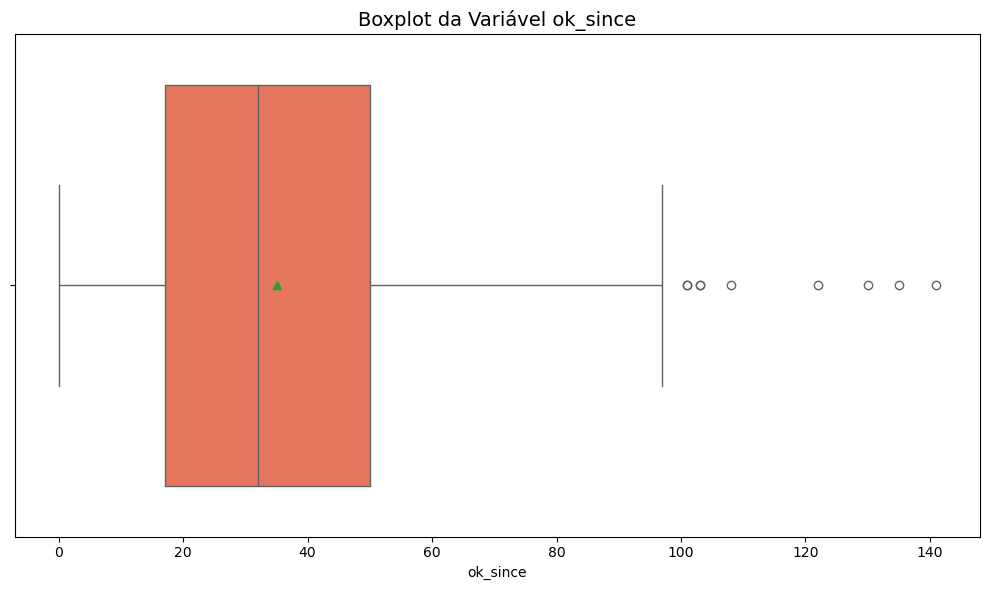

In [7]:
plot_boxplot(df, 'ok_since')

Análise estatística do boxplot da variável 'ok_since':
 
- A mediana (linha central da caixa) está em torno de 30 meses, indicando que metade dos clientes está regular com o banco há 30 meses ou menos.
- O primeiro quartil (borda inferior da caixa) está próximo de 10 meses, enquanto o terceiro quartil (borda superior) está em torno de 35 meses.
- Há uma assimetria positiva na distribuição, com a cauda superior mais longa que a inferior.
- Existem diversos outliers acima do limite superior, sugerindo que alguns clientes têm um histórico de regularidade muito maior do que a maioria.
- A média (representada pelo ponto dentro da caixa) está acima da mediana, confirmando a assimetria positiva da distribuição.
- A amplitude interquartil (tamanho da caixa) é relativamente grande, indicando uma dispersão considerável nos dados centrais.

Esta análise sugere que, embora a maioria dos clientes tenha um histórico de regularidade relativamente curto (até 35 meses), há um grupo significativo com históricos muito mais longos, possivelmente clientes mais antigos ou leais.

#### Variável `last_amount_borrowed`

In [8]:
col_info(df, 'last_amount_borrowed')

Análise para a variável: last_amount_borrowed

Resumo Estatístico:
count    15044.00
mean     13782.34
std       8077.57
min       1005.18
25%       7519.50
50%      12023.46
75%      19220.27
max      35059.60
Name: last_amount_borrowed, dtype: float64

Valores Únicos:
Número de valores únicos: 14326
Primeiros valores únicos:
[25033.92      nan  7207.92  5019.53  7524.9  35027.98 20034.25  8024.08
 35022.74 10820.95]


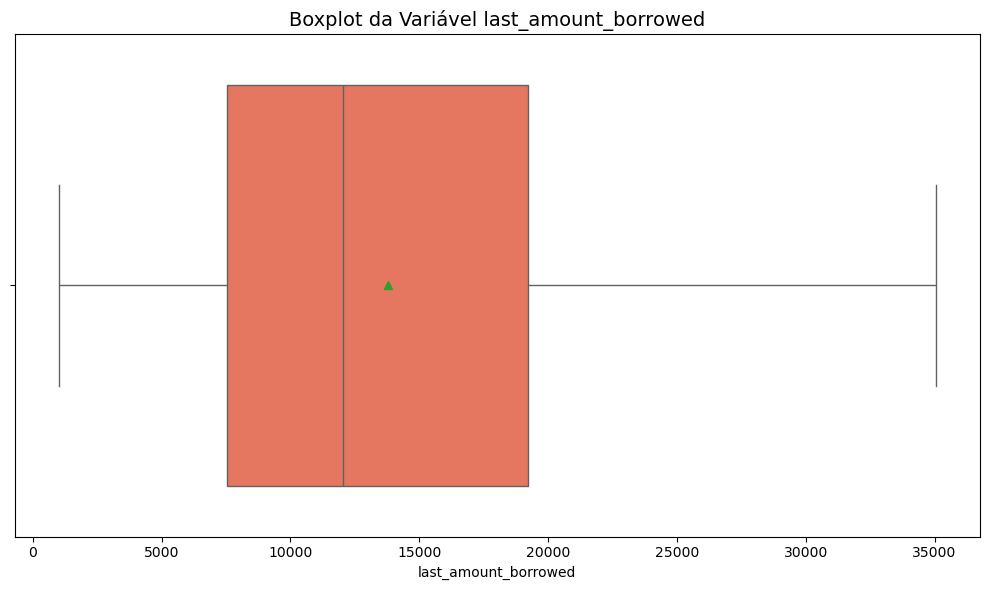

In [9]:
plot_boxplot(df, 'last_amount_borrowed')

A variável possui uma distribuição levemente enviesada para valores abaixo de 20 mil. Essa variável possui uma média próxima da mediana, que só é levantada devido aos valores de empréstimos acima do terceiro quartil.

Serão imputados zeros no lugar dos NaN, pois provavelmente os valores ausentes já estão lá para representar os clientes que não pediram nenhum tipo de empréstimo.

In [10]:
# Selecionar entradas com NaN nas colunas especificadas
cols_to_check = ['last_amount_borrowed', 'last_borrowed_in_months', 'n_defaulted_loans', 'n_bankruptcies']
nan_mask = df[cols_to_check].isna().any(axis=1)


# Selecionar essas entradas
nan_entries = df[nan_mask]

# Contar as proporções de classes para target_default
class_counts = nan_entries['target_default'].value_counts(normalize=True)

print("Proporção de classes para entradas com NaN nas colunas especificadas:")
print(class_counts)

# Calcular o número total de entradas com NaN
total_nan_entries = nan_entries.shape[0]

print(f"\nNúmero total de entradas com NaN: {total_nan_entries}")
print(f"Porcentagem do conjunto de dados: {(total_nan_entries / df.shape[0]) * 100:.2f}%")

Proporção de classes para entradas com NaN nas colunas especificadas:
target_default
False    0.838426
True     0.161574
Name: proportion, dtype: float64

Número total de entradas com NaN: 30001
Porcentagem do conjunto de dados: 66.67%


Note que, entre essas entradas ausentes, a maioria tem como valor no alvo a classe _False_, de cliente regulares. Logo, diz respeito aos clientes que possuem algum crédito.

Seria necessário um conhecimento mais aprofundado dos dados para entender como poderíamos imputar os 16% de clientes contados como inadimplentes. De fato, imputar zero para essas entradas não faz sentido, uma vez que para se tornar inadimplente, é preciso antes ter feito um empréstimo (ou seja, last_amount_borrowed diferente de zero).

Mas vamos seguir com essa formulação para esse projeto.

#### Variável `credit_limit`

In [11]:
col_info(df, 'credit_limit')

Análise para a variável: credit_limit

Resumo Estatístico:
count     31200.00
mean      34381.95
std       36586.98
min           0.00
25%       10000.00
50%       25647.00
75%       47086.75
max      448269.00
Name: credit_limit, dtype: float64

Valores Únicos:
Número de valores únicos: 20929
Primeiros valores únicos:
[     0.  39726.     nan  54591.  61055.  42666.  16291.  70840. 187003.
  76387.]


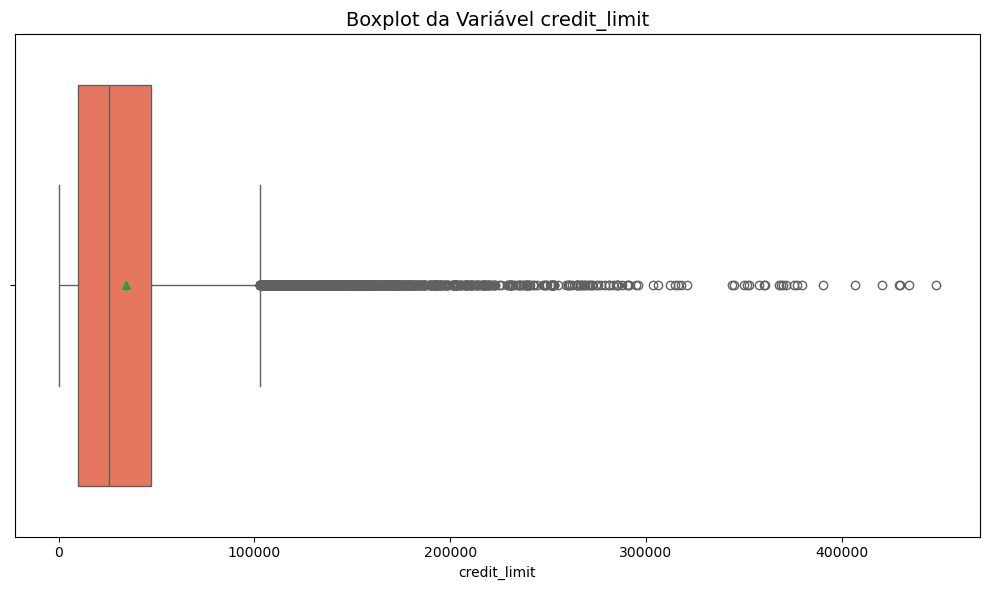

In [12]:
plot_boxplot(df, 'credit_limit')

Novamente, vemos que se trata de uma distribuição bastante enviesada, contando com muitos _outliers_ que acabam trazendo a média para cima.

É natural no contexto do problema que haja alguns clientes com valores de créditos aprovados muito grandes.

#### Variável `n_issues`

Essa variável reporta a quantidade de problemas (reclamações dos clientes ou problemas da empresa com o cliente?). Não há mais detalhes sobre ela.

In [13]:
col_info(df, 'n_issues')

Análise para a variável: n_issues

Resumo Estatístico:
count    33456.00
mean        11.07
std          4.60
min          0.00
25%          8.00
50%         10.00
75%         14.00
max         49.00
Name: n_issues, dtype: float64

Valores Únicos:
Número de valores únicos: 45
Primeiros valores únicos:
[18. 14. nan 19.  9.  7.  8. 16. 20.  5.]


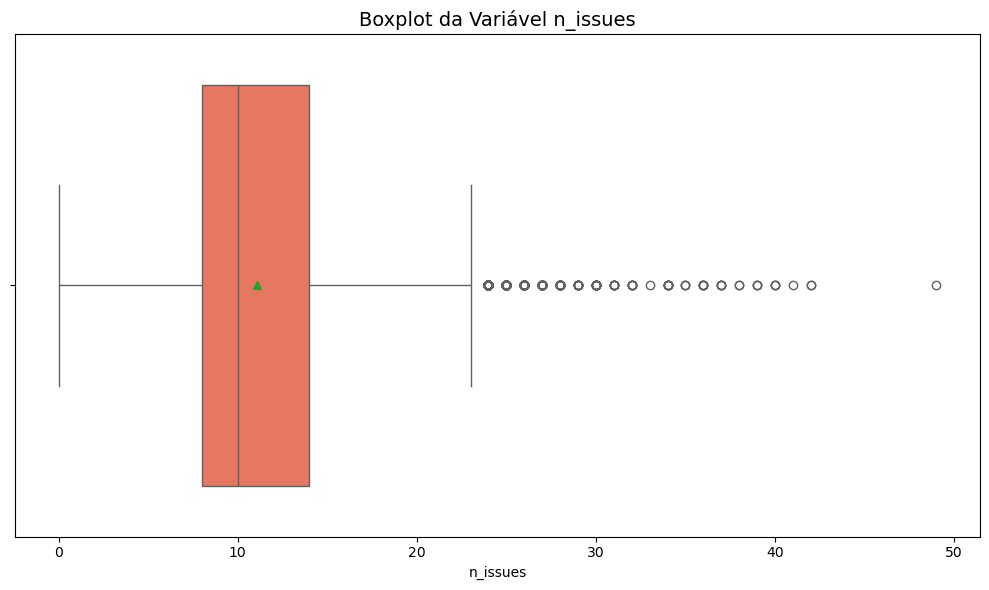

In [14]:
plot_boxplot(df, 'n_issues')

#### Variável `external_data_provider_email_seen_before`

Esta variável parece indicar quantas vezes o e-mail do cliente foi visto antes pelo provedor de dados externo. Isso pode ser um indicador de atividade online ou histórico do cliente.

In [15]:
col_info(df, 'external_data_provider_email_seen_before')

Análise para a variável: external_data_provider_email_seen_before

Resumo Estatístico:
count    42767.00
mean        12.53
std        126.53
min       -999.00
25%         11.00
50%         27.00
75%         43.00
max         59.00
Name: external_data_provider_email_seen_before, dtype: float64

Valores Únicos:
Número de valores únicos: 63
Primeiros valores únicos:
[51. 17.  9. 38. 46. 21. 16. 37.  6. nan]


Note que essa variável possui um outlier negativo. Ele foi removido no conjunto de dados limpo, como podemos ver abaixo.

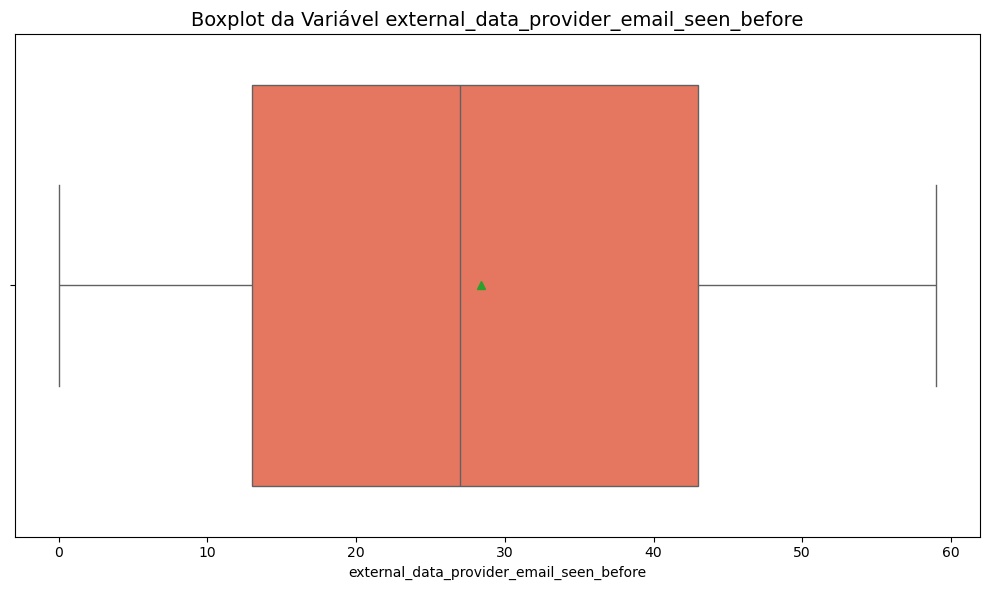

In [16]:
plot_boxplot(df_clean, 'external_data_provider_email_seen_before')

#### Variável `n_bankruptcies`

Esta variável representa o número de falências associadas ao cliente. É uma informação importante para avaliar o histórico financeiro e o risco potencial do cliente.

In [17]:
col_info(df, 'n_bankruptcies')

Análise para a variável: n_bankruptcies

Resumo Estatístico:
count    44303.00
mean         0.08
std          0.27
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          5.00
Name: n_bankruptcies, dtype: float64

Valores Únicos:
Número de valores únicos: 7
Primeiros valores únicos:
[ 0.  1. nan  2.  3.  4.  5.]


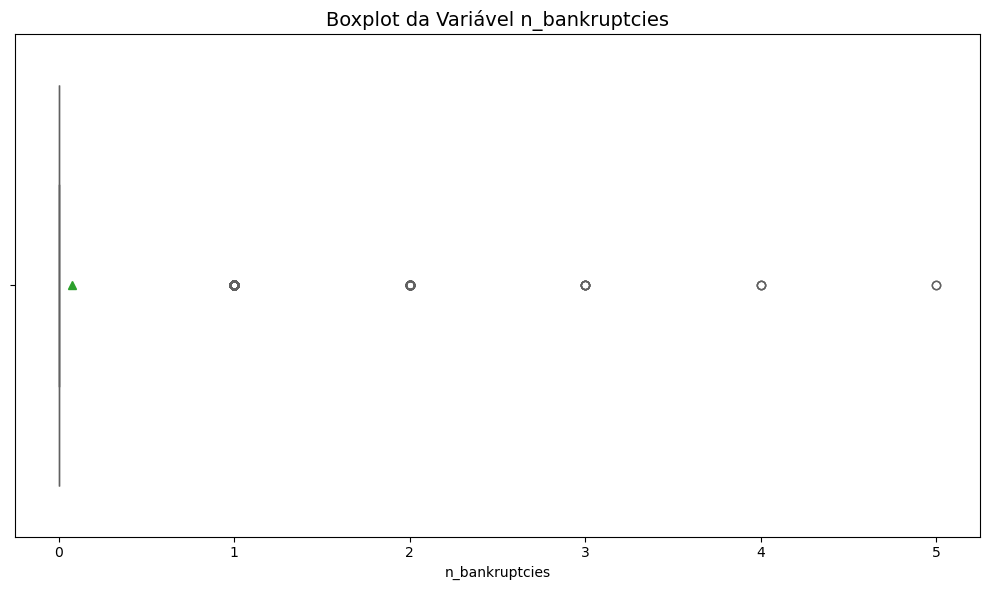

In [18]:
plot_boxplot(df_clean, 'n_bankruptcies')

Como é de se esperar, a maioria dos clientes nunca passaram por uma falência, de modo que todos os valores maiores do que zero são considerados outliers.

Vamos visualizar num gráfico de barras a proporção dos dados.

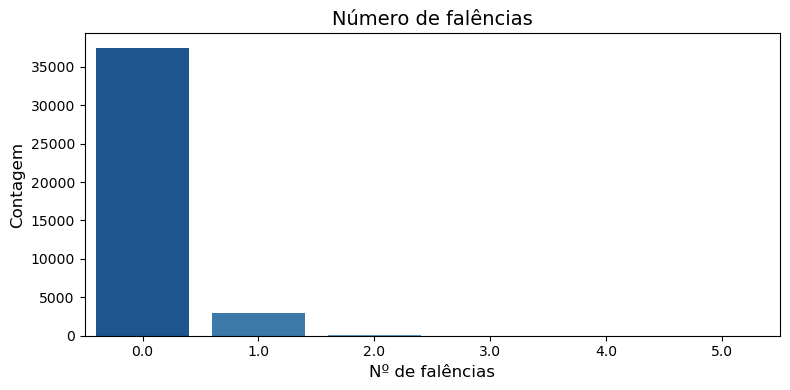

In [19]:
fig,ax = plt.subplots(figsize = (8, 4))

sns.countplot(df_clean, x = 'n_bankruptcies', palette = 'Blues_r', ax = ax)

ax.set_title('Número de falências', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 12)
ax.set_xlabel('Nº de falências', fontsize = 12)

fig.tight_layout()

#### Variável `marketing_channel`

Esta variável representa o canal de marketing através do qual o cliente foi adquirido. É uma informação importante para entender quais estratégias de marketing estão sendo mais eficazes na aquisição de clientes bons.

In [20]:
col_info(df_clean, 'marketing_channel')

Análise para a variável: marketing_channel

Resumo Estatístico:
count       40488
unique          9
top       Website
freq        13095
Name: marketing_channel, dtype: object

Valores Únicos:
Número de valores únicos: 9
Primeiros valores únicos:
['Invite-email' 'Radio-commercial' 'Waiting-list' 'Website' 'Twitter'
 'Facebook' 'Instagram' 'Invite-web' 'LinkedIn']


In [21]:
def plot_value_counts(
        df: pd.DataFrame, 
        column: str, 
        title: str = None,
        ) -> None:
    """
    Visualiza a contagem de valores para uma determinada característica como um gráfico de barras usando seaborn,
    com uma hue para target_default.
    
    Args:
        df (pd.DataFrame): O DataFrame de entrada.
        column (str): O nome da coluna a ser visualizada.
        title (str, opcional): O título do gráfico. Se None, usa o nome da coluna.
    """
    # Cria a figura e os eixos
    fig, ax = plt.subplots(figsize = (12, 8))
    
    # Cria o gráfico de barras usando countplot com hue para target_default
    sns.countplot(
        data=df,
        y=column,
        hue='target_default',
        order=df[column].value_counts().index[:10],
        palette='viridis',
        ax=ax
    )
    
    # Personaliza o gráfico
    ax.set_title(title or f'Contagem de Valores para {column}', fontsize=14)
    ax.set_xlabel('Contagem', fontsize=12)
    ax.set_ylabel(column, fontsize=12)
    ax.legend(title='Target Default', labels=['Não', 'Sim'])
    
    # Ajusta o layout
    fig.tight_layout()

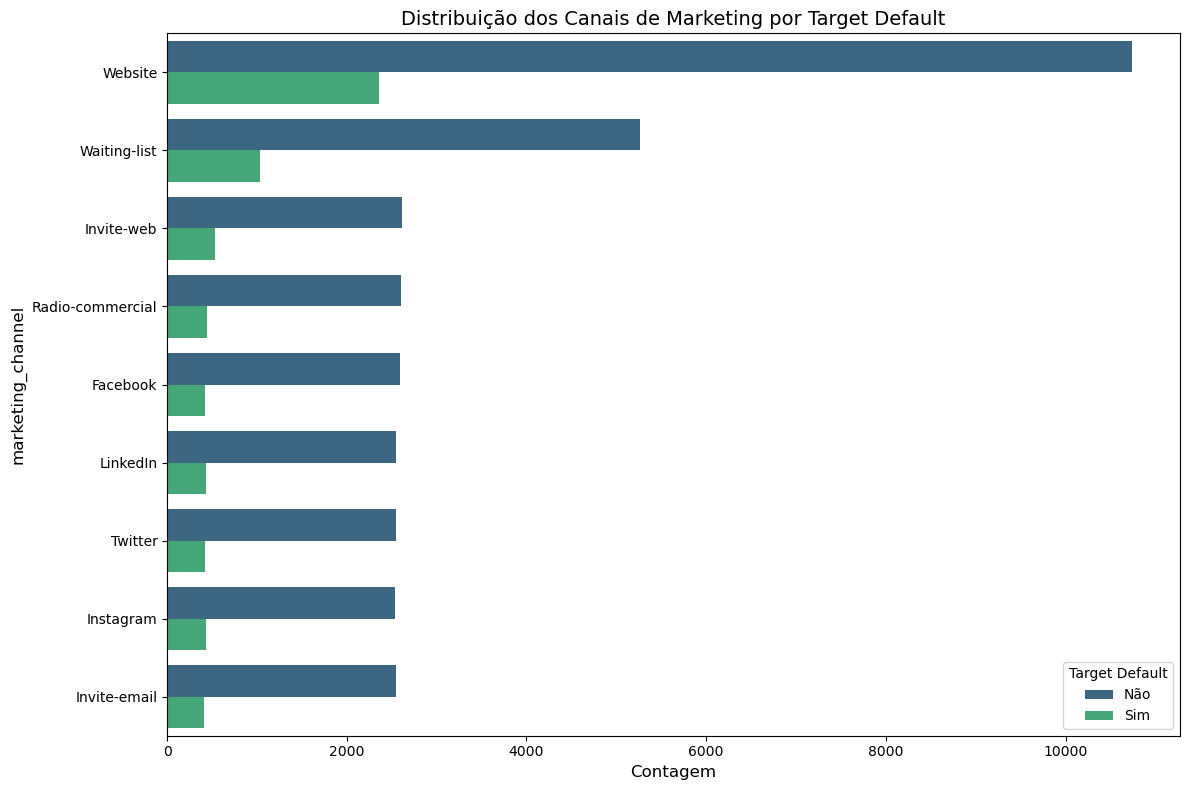

In [22]:
plot_value_counts(df_clean, 'marketing_channel', 'Distribuição dos Canais de Marketing por Target Default')

Nota-se que a maioria dos clientes vem pelo website, seguido de uma lista de espera. Analisando mais detalhadamente:

1. O canal "Website" é o mais predominante, indicando que a maioria dos clientes encontra a empresa através de sua presença online.

2. "Waiting-list" é o segundo canal mais comum, sugerindo que a empresa pode ter uma demanda significativa ou um processo de onboarding controlado.

3. "Invite-email" aparece como o terceiro canal mais utilizado, indicando que a estratégia de marketing por e-mail da empresa tem um impacto considerável.

4. Canais como "Radio-commercial" e os outros têm uma presença menor, mas ainda contribuem para a aquisição de clientes.

5. Observa-se que a proporção de defaults (representada pela cor laranja) não parece variar entre os diferentes canais de marketing.

#### Variável `n_defaulted_loans`

A variável `n_defaulted_loans` representa o número de empréstimos em que o cliente entrou em default no passado. Esta é uma informação importante para avaliar o histórico de crédito do cliente e pode ser um indicador significativo do risco de inadimplência futura.

In [23]:
col_info(df_clean, 'n_defaulted_loans')

Análise para a variável: n_defaulted_loans

Resumo Estatístico:
count    40488.00
mean         0.00
std          0.08
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          5.00
Name: n_defaulted_loans, dtype: float64

Valores Únicos:
Número de valores únicos: 5
Primeiros valores únicos:
[0. 1. 2. 3. 5.]


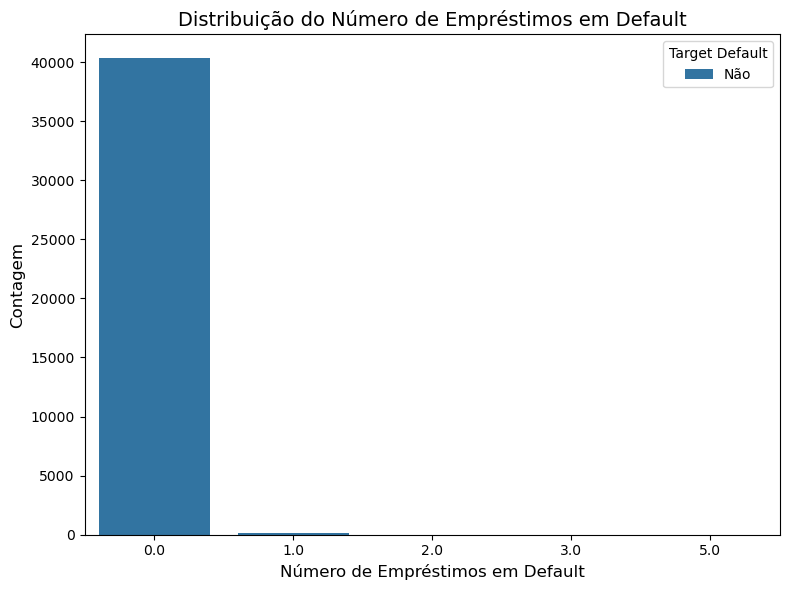

In [24]:
# Criar um gráfico de contagem para n_defaulted_loans
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df_clean, x='n_defaulted_loans', ax=ax)

# Personalizar o gráfico
ax.set_title('Distribuição do Número de Empréstimos em Default', fontsize=14)
ax.set_xlabel('Número de Empréstimos em Default', fontsize=12)
ax.set_ylabel('Contagem', fontsize=12)
ax.legend(title='Target Default', labels=['Não', 'Sim'])

# Ajustar o layout
fig.tight_layout()

A maioria dos clientes não possuem empréstimos em inadimplência, como é de se esperar pela própria distribuição da variável-alvo.

#### Variável `n_accounts`

A variável `n_accounts` representa o número de contas que o cliente possui. Esta informação pode ser relevante para entender o perfil financeiro do cliente e sua relação com instituições bancárias.

In [25]:
col_info(df_clean, 'n_accounts')

Análise para a variável: n_accounts

Resumo Estatístico:
count    40488.00
mean        10.64
std          4.59
min          1.00
25%          7.00
50%         10.00
75%         13.00
max         49.00
Name: n_accounts, dtype: float64

Valores Únicos:
Número de valores únicos: 43
Primeiros valores únicos:
[18. 14. 10. 19. 11.  9.  8.  7. 16.  6.]


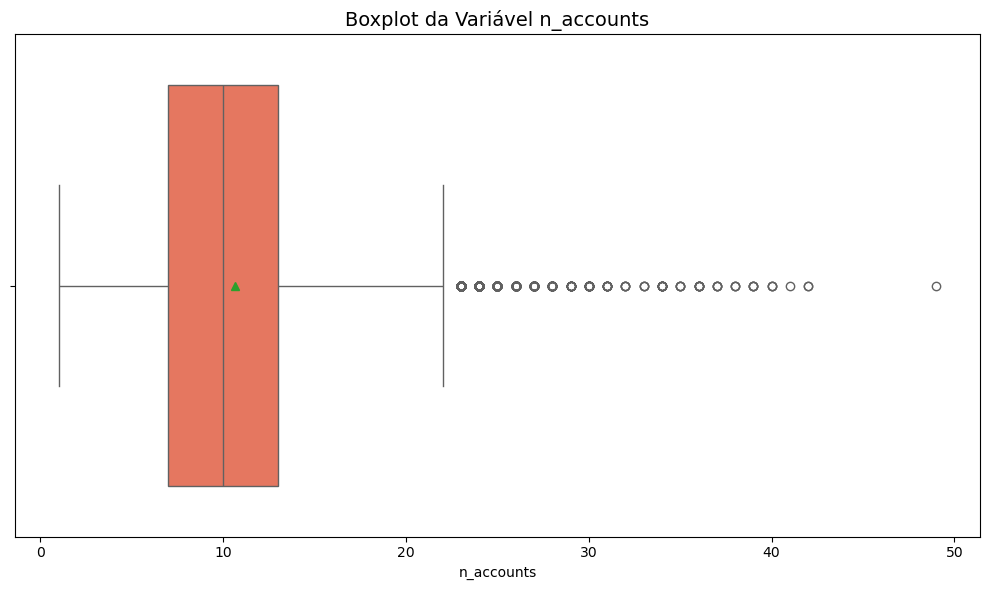

In [26]:
plot_boxplot(df_clean, 'n_accounts')

#### Variável `risk_rate`

A variável `risk_rate` representa uma pontuação de risco atribuída ao cliente. Esta é uma métrica crucial para avaliar a probabilidade de inadimplência e pode ser baseada em diversos fatores do histórico financeiro do cliente.

In [27]:
col_info(df_clean, 'risk_rate')

Análise para a variável: risk_rate

Resumo Estatístico:
count    40488.00
mean         0.29
std          0.10
min          0.00
25%          0.22
50%          0.29
75%          0.36
max          0.90
Name: risk_rate, dtype: float64

Valores Únicos:
Número de valores únicos: 81
Primeiros valores únicos:
[0.4  0.24 0.29 0.32 0.18 0.44 0.43 0.33 0.36 0.22]


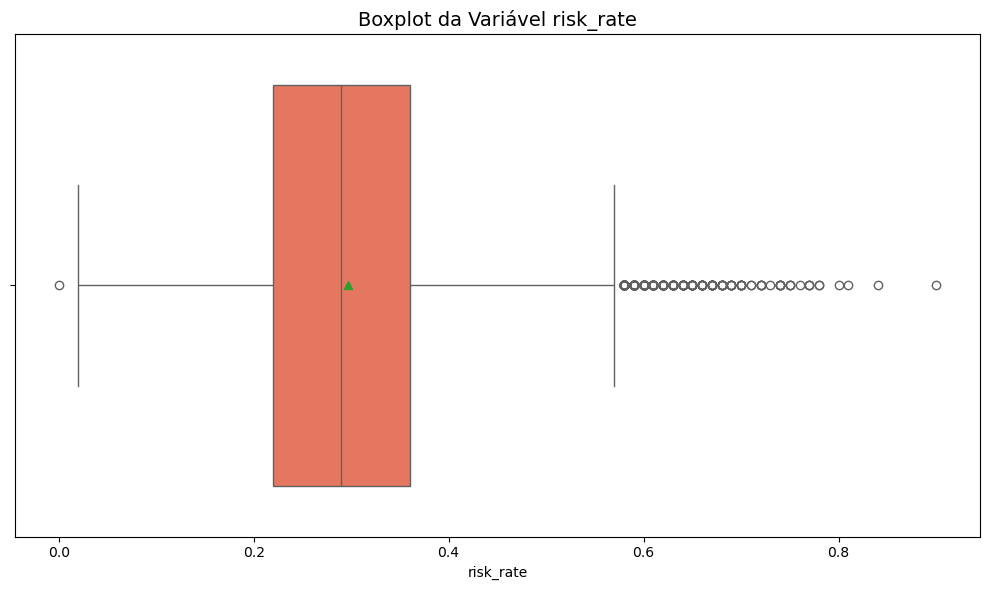

In [28]:
plot_boxplot(df, 'risk_rate')

A maioria dos clientes possui um risco em torno de 30%. Como é uma minoria que se torna inadimplentes, isso é refletido nos _outliers_ dessa distribuição.

#### Variável `income`

A variável `income` representa a renda declarada pelo cliente, um fator crucial na avaliação de risco de crédito.


In [29]:
col_info(df_clean, 'income')

Análise para a variável: income

Resumo Estatístico:
count      40488.00
mean       71143.66
std        52541.40
min         4821.18
25%        44021.33
50%        60048.96
75%        85035.72
max      5000027.83
Name: income, dtype: float64

Valores Únicos:
Número de valores únicos: 37753
Primeiros valores únicos:
[ 65014.12 100018.91  65023.65  68830.01  60011.29  75024.28  49234.65
  80024.6   31019.09  45026.26]


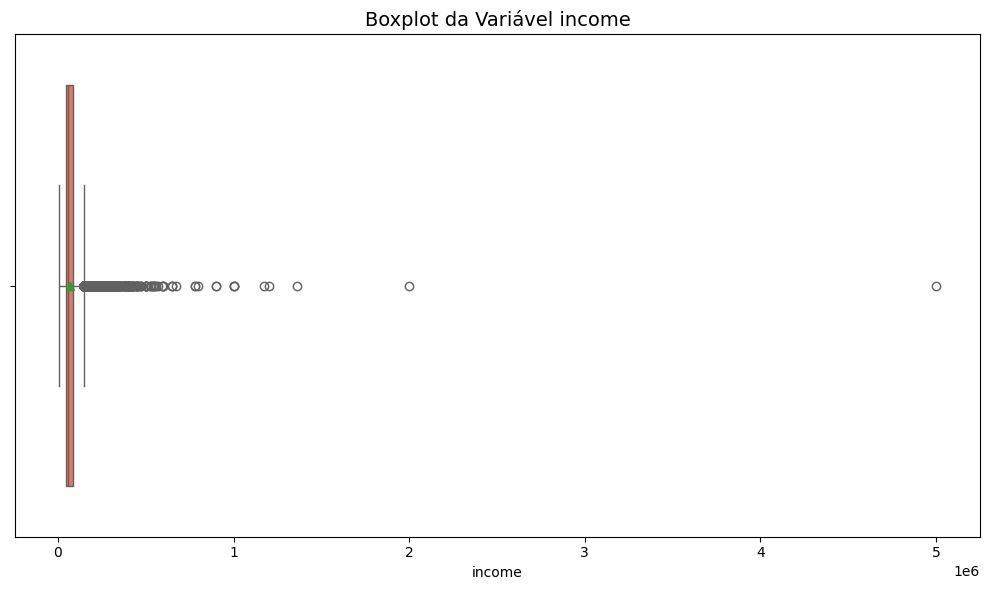

In [30]:
plot_boxplot(df_clean, 'income')

Os _outliers_ nessa variável são muito discrepantes. Estes serão removidos para não influenciar fortemente a estatística e enviesar o algoritmo, piorando sua performance.

In [31]:
def remove_outliers(
        df: pd.DataFrame, 
        percentile: float = .8
        ) -> pd.DataFrame:
    """
    Remove outliers da coluna 'income' com base em um percentil especificado.
    
    Args:
        df (pd.DataFrame): DataFrame de entrada.
        percentile (float): Limiar percentil para remoção de outliers. Padrão é 0.8.
    
    Returns:
        pd.DataFrame: DataFrame com outliers removidos.
    """
    df_clean = df.copy()
    
    # Calcula o valor limite
    threshold = df_clean['income'].quantile(percentile)
    
    # Remove outliers
    df_clean = df_clean[df_clean['income'] <= threshold]
    
    # Reinicia o índice
    df_clean.reset_index(drop=True, inplace=True)
    
    print(f"Removidos {len(df) - len(df_clean)} outliers acima do percentil {percentile:.2f}.")
    print(f"Nova forma do DataFrame: {df_clean.shape}")
    
    return df_clean

In [32]:
df_clean = remove_outliers(df_clean, percentile = .95)

Removidos 2025 outliers acima do percentil 0.95.
Nova forma do DataFrame: (38463, 24)


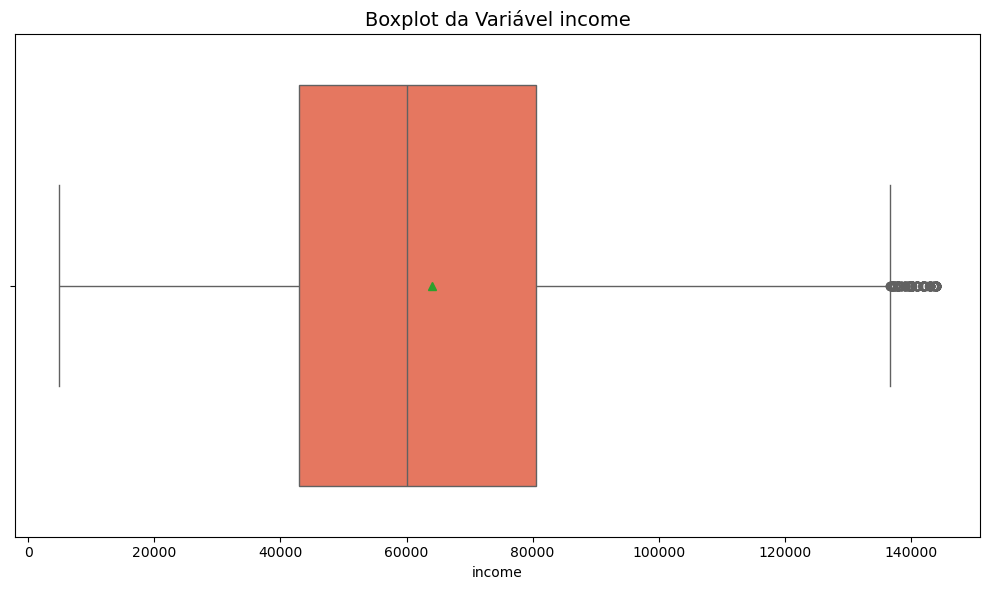

In [33]:
plot_boxplot(df_clean, 'income')

In [34]:
col_info(df_clean, 'income')

Análise para a variável: income

Resumo Estatístico:
count     38463.00
mean      64026.76
std       27622.95
min        4821.18
25%       43009.76
50%       60018.60
75%       80476.97
max      144026.24
Name: income, dtype: float64

Valores Únicos:
Número de valores únicos: 35743
Primeiros valores únicos:
[ 65014.12 100018.91  65023.65  68830.01  60011.29  75024.28  49234.65
  80024.6   31019.09  45026.26]


#### Variável `reported_income`

A variável `reported_income` representa a renda declarada pelos solicitantes de empréstimo. É importante analisar esta variável para entender a distribuição de renda dos clientes e identificar possíveis padrões ou anomalias que possam influenciar as decisões de crédito.


In [35]:
col_info(df, 'reported_income')

Análise para a variável: reported_income

Resumo Estatístico:
count     45000.00
mean           inf
std            NaN
min         403.00
25%       50948.25
50%      101779.00
75%      151337.25
max            inf
Name: reported_income, dtype: float64

Valores Únicos:
Número de valores únicos: 40025
Primeiros valores únicos:
[ 57849.   4902. 163679.   1086. 198618. 160198. 132928.   8658.  82272.
  96889.]


Note que essa variável, antes da limpeza, apresenta um _outlier_ infinito. No conjunto limpo, essas entradas foram removidas.

In [36]:
col_info(df_clean, 'reported_income')

Análise para a variável: reported_income

Resumo Estatístico:
count    3.846300e+04
mean     1.074040e+13
std      2.610497e+14
min      4.030000e+02
25%      5.104750e+04
50%      1.017090e+05
75%      1.511465e+05
max      6.355500e+15
Name: reported_income, dtype: float64

Valores Únicos:
Número de valores únicos: 34735
Primeiros valores únicos:
[ 57849.   4902. 163679.   1086. 198618. 160198. 132928.   8658.  82272.
  96889.]
